# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
df_ori = pd.read_csv('HousingData.csv')
df=df_ori.copy()

In [28]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


# Data Cleaning

Untuk saat ini dilakukan drop duplikat dan missing values.

Nantinya data cleaning dilakukan sesuai dengan konteks datanya.

In [4]:
df = df.drop_duplicates()

In [5]:
df = df.dropna()

# Linear Regression

Sebelum melakukan prediksi, terlebih dahulu harus ditentukan mana kolom yang menjadi feature dan target.

Dalam hal ini kita akan menggunakan `MEDV` sebagai target dan lainnya sebagai feature.

## Split Feature dan Target

In [6]:
X = df.drop(columns='MEDV') # Feature untuk memprediksi
y = df[['MEDV']] # Target yang akan diprediksi

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [8]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
5,28.7


## Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

## Model Training

In [11]:
from sklearn.linear_model import LinearRegression

# Tentukan model yang akan digunakan
lin_reg = LinearRegression()

# Train Model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [12]:
# retrieve the coefficients
data = X_train
model = lin_reg

coef_df = pd.DataFrame({
    'feature':['intercept'] + data.columns.tolist(),
    'coefficient':[model.intercept_[0]] + list(model.coef_[0])
})

coef_df

,feature,coefficient
0,intercept,33.652405
1,CRIM,-0.112187
2,ZN,0.042440
3,INDUS,0.025673
4,CHAS,1.983837
5,NOX,-17.079257
6,RM,4.258091
7,AGE,-0.021741
8,DIS,-1.424189
9,RAD,0.235588


Contoh interpretasi dari koefisien :
* Setiap kenaikan 1 poin dari ZN dengan asumsi feature lain dianggap tetap, akan terjadi kenaikan 0.042440 pada MEDV.

# Multiple Linear Regression

## Split Feature dan Target

In [13]:
X = df.drop(columns='MEDV') # Feature untuk memprediksi
y = df[['MEDV']] # Target yang akan diprediksi

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
X_train.shape,  X_test.shape, y_train.shape, y_test.shape

((315, 13), (79, 13), (315, 1), (79, 1))

## Multicollinearity Check

In [16]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.682416
2,ZN,2.273766
3,INDUS,4.241354
4,CHAS,1.089018
5,NOX,4.452894
6,RM,2.085863
7,AGE,3.163989
8,DIS,4.033996
9,RAD,7.100781
10,TAX,9.157594


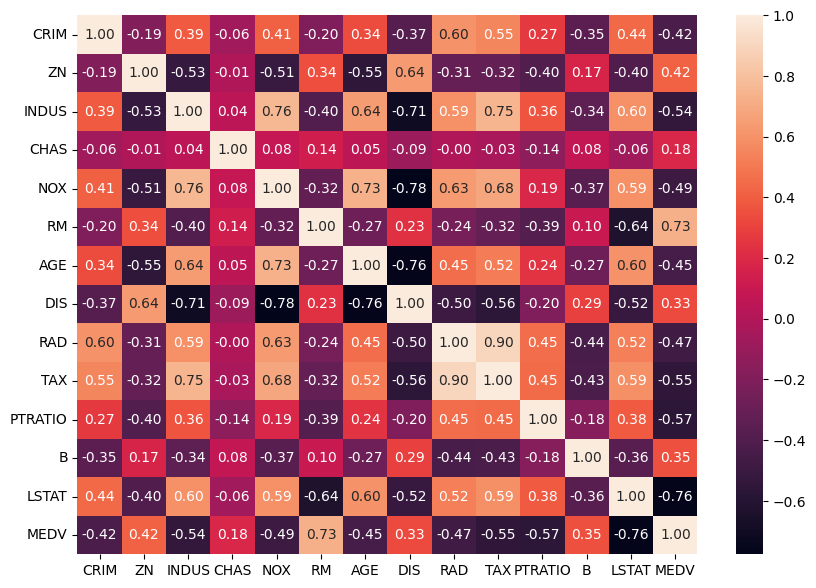

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# heatmap correlation
data_train = pd.concat([X_train, y_train], axis=1)
corr = data_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

`TAX` dan `RAD` mempunyai nilai vif score cukup tinggi.

`TAX` dan `RAD` mempunyai korelasi yang kuat. `TAX` mempunyai korelasi yang lebih kuat terhadap target yaitu `MEDV` dibandingkan `RAD`, sehingga dipilih `RAD` untuk didrop.

In [18]:
X_train = X_train.drop(columns=['RAD'])
X_test = X_test.drop(columns=['RAD'])

## Recheck multicollinearity

In [19]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train)

vif_df = pd.DataFrame([vif(X_vif.values, i)
               for i in range(X_vif.shape[1])],
              index=X_vif.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,CRIM,1.555775
2,ZN,2.230211
3,INDUS,3.706428
4,CHAS,1.072991
5,NOX,4.184477
6,RM,2.045362
7,AGE,3.150615
8,DIS,4.015898
9,TAX,3.728418
10,PTRATIO,1.746087


Tidak ada lagi vif score yang tinggi

## Model Training

In [20]:
from sklearn.linear_model import LinearRegression

# Tentukan model yang akan digunakan
multi_reg = LinearRegression()

# Train Model
multi_reg.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Training Error

Prediksi data train menggunakan model yang sudah dilatih

In [21]:
y_predict_train = multi_reg.predict(X_train)

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_train)))
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_train))))

R-squared for training data is 0.7346297199127012
RMSE for training data is 4.15879372493931


### Testing Error

Prediksi data test menggunakan model yang sudah dilatih

In [23]:
y_predict_test = multi_reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_test))))

RMSE for testing data is 5.777567797591262


#liveclass

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df= df.dropna(how='any')

In [6]:
target='MEDV'

x=df.drop([target], axis=1)
y=df['MEDV']

In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 43.1 KB


In [16]:
y.info()

<class 'pandas.core.series.Series'>
Index: 394 entries, 0 to 504
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
394 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


split the train and test data

In [ ]:
x_train=x.loc[:320]
x_test = x.loc[320:]

y_train=y.loc[:320]
y_test=y.loc[320]

In [8]:
from sklearn.model_selection import train_test_split #snake_case

In [54]:
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2, #bisa juga train_size=0.8
                                                    random_state=42 #untuk memastikan setiap run sama
                                                    )

In [18]:
from sklearn.preprocessing import MinMaxScaler #Camelcase juga karena untuk transformator

In [ ]:
scaler= MinMaxScaler
scaler.fit(X_train,y_train)
scaler.transform(X_train,y_train)

In [56]:
from sklearn.linear_model import LinearRegression # CamelCase -> estimator -> prediksi/transformasi
#estimator pasti ada
#define
linreg= LinearRegression()
#fit
linreg.fit(X_train,y_train)

#transform/predict
y_pred=linreg.predict(X_test)

In [57]:
#memasukkan intercept dan koefisien
linreg.coef_

array([-1.12187394e-01,  4.24404148e-02,  2.56728238e-02,  1.98383708e+00,
       -1.70792571e+01,  4.25809072e+00, -2.17413906e-02, -1.42418883e+00,
        2.35587949e-01, -1.19971379e-02, -9.75834850e-01,  9.59377961e-03,
       -3.88619588e-01])

In [58]:
linreg.intercept_

33.65240504056566

In [45]:
print(linreg)

LinearRegression()


In [ ]:
for true, predicted in zip(y_test,y_pred):
    print(true, predicted)

In [59]:
for col, coef in zip(x.columns, linreg.coef_):
    print('Column:{}, \tcoef:{}'.format(col, coef))

Column:CRIM, 	coef:-0.11218739411170246
Column:ZN, 	coef:0.042440414832856474
Column:INDUS, 	coef:0.025672823789495765
Column:CHAS, 	coef:1.9838370841048505
Column:NOX, 	coef:-17.07925707304
Column:RM, 	coef:4.258090716067665
Column:AGE, 	coef:-0.021741390648339624
Column:DIS, 	coef:-1.424188834274611
Column:RAD, 	coef:0.2355879489700081
Column:TAX, 	coef:-0.011997137901475143
Column:PTRATIO, 	coef:-0.9758348496021824
Column:B, 	coef:0.009593779607598687
Column:LSTAT, 	coef:-0.3886195878856801


#mengatasi multikol

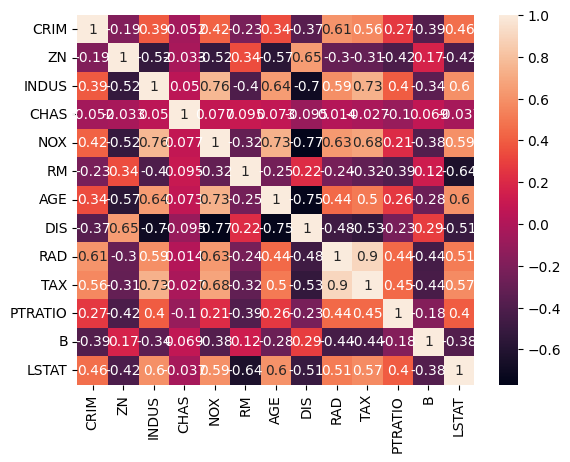

<Figure size 1000x700 with 0 Axes>

In [26]:
sns.heatmap(x.corr(), annot=True)
plt.figure(figsize=(10,7))
plt.show()

In [60]:
target='MEDV'

x_2=df.drop([target, 'INDUS', 'NOX', 'DIS', 'RAD'], axis=1)
y_2=df['MEDV']

In [61]:
X2_train, X2_test, y2_train, y2_test = train_test_split(x_2, 
                                                    y_2, 
                                                    test_size=0.2, #bisa juga train_size=0.8
                                                    random_state=42 #untuk memastikan setiap run sama
                                                    )

In [62]:
linreg_2= LinearRegression()
#fit
linreg_2.fit(X2_train,y2_train)

#transform/predict
y2_pred=linreg_2.predict(X2_test)

In [63]:
for col, coef in zip(x_2.columns, linreg.coef_):
    print('Column:{}, \tcoef:{}'.format(col, coef))

Column:CRIM, 	coef:-0.11218739411170246
Column:ZN, 	coef:0.042440414832856474
Column:CHAS, 	coef:0.025672823789495765
Column:RM, 	coef:1.9838370841048505
Column:AGE, 	coef:-17.07925707304
Column:TAX, 	coef:4.258090716067665
Column:PTRATIO, 	coef:-0.021741390648339624
Column:B, 	coef:-1.424188834274611
Column:LSTAT, 	coef:0.2355879489700081


#mengevaluasi model

In [64]:
#rsquare
linreg.score(X_test, y_test)


0.627084994167318

In [65]:
linreg_2.score(X2_test, y2_test)

0.5580801589332212

In [66]:
#meansquareerror(mse)
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, linreg.predict(X_test))


31.454047664950963

In [67]:
np.sqrt(mean_squared_error(y_test, linreg.predict(X_test)))

5.608390826694495

In [68]:
mean_squared_error(y2_test, linreg_2.predict(X2_test))

37.274358842075365

In [69]:
np.sqrt(mean_squared_error(y2_test, linreg_2.predict(X2_test)))

6.105273035833481

In [70]:
#meanaverageerror
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3.367983225154248

In [71]:
mean_absolute_error(y2_test, y2_pred)

3.594173954664032

MISI 2

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Dataset
dataset = 'https://storage.googleapis.com/dqlab-dataset/HousingData.csv'
df = pd.read_csv(dataset)

# drop missing values
df = df.dropna()

# pisahkan antara kolom variable dan target ("MEDV" menjadi kolom target)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# train test split dengan ratio 0,75 dan 0,25 dan set random_state=0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# train dataset menggunakan Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

#hitung rmse dan r2 untuk dataset train
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_predict))
r2_train = r2_score(y_train,y_train_predict)

#hitung rmse dan r2 untuk dataset test
rmse_test = np.sqrt(mean_squared_error(y_test,y_test_predict))
r2_test = r2_score(y_test,y_test_predict)

print(rmse_train)
print(rmse_test)
print(r2_train)
print(r2_test)

4.2358891151378115
4.979200525852066
0.794441799000839
0.6536779562256632


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

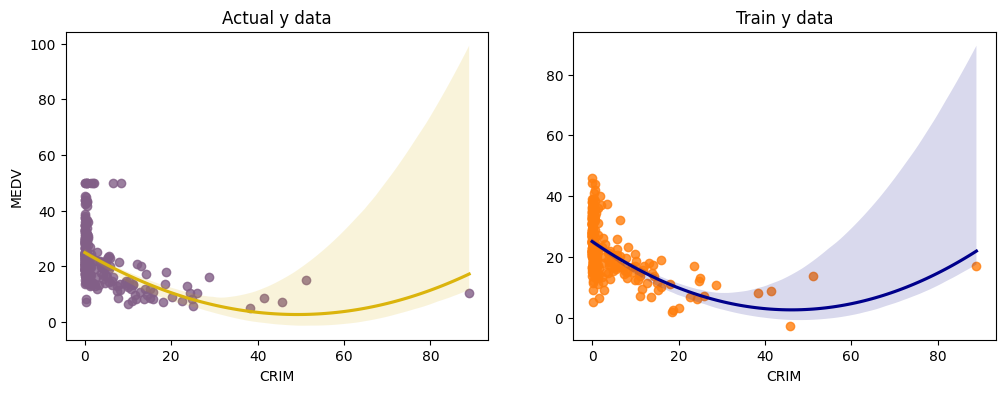

In [46]:
fig, axs= plt.subplots(1,2, figsize=(12,4))
sns.regplot(x=X_train['CRIM'], y=y_train, ax=axs[0], order=2, scatter_kws={"color": '#825F87'}, line_kws={"color": "xkcd:gold"}).set_title("Actual y data")
sns.regplot(x=X_train['CRIM'], y=y_train_predict, ax=axs[1], order=2, scatter_kws={"color": 'C1'}, line_kws={"color": "darkblue"}).set_title("Train y data")
plt.show()